In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pyowm
from fbprophet import Prophet

%matplotlib inline
plt.style.use('fivethirtyeight')


In [156]:
#owm = pyowm.OWM('ef50c0a0f5f174446e0cec5257d6b253')
#matplotlib
#format graph so it is reversed
#facebook prophet with guide from susan li
#link is here: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

## Load data sources

In [174]:
airport = pd.read_excel("/Users/stephenhyungilkim/Desktop/Iceland/hola.xlsx", parse_dates=["year"], index_col="year", freq='Y')
airport.head(5)

,Canada,Denmark,Finland,France,Germany,Italy,Japan,Netherlands,Norway,Spain,Sweden,Switzerland,United Kingdom,USA,Other countries
year,,,,,,,,,,,,,,,
2003-01-01,2559,24326,6970,20345,36807,8991,4458,10726,24417,5126,25211,6121,52973,45242,34496
2004-01-01,3481,32845,7460,21482,38539,9470,6525,11014,26746,5613,27045,6964,59856,48366,43127
2005-01-01,3446,34952,8373,20516,37387,8972,6119,11158,24541,6436,26602,6600,58560,54631,52894
2006-01-01,4424,38205,8535,21073,38489,8840,6461,11514,28540,7999,27365,5965,67530,55800,68161
2007-01-01,6296,41392,9875,22671,40556,10475,6096,14405,34779,9455,33356,6911,73391,51909,97432


In [175]:
facts = pd.read_csv("/Users/stephenhyungilkim/Desktop/Iceland/chau.csv", parse_dates=["Date"], index_col="Date")
facts.head(5)

,Merchandise trade (% of GDP),"International tourism, number of arrivals","Population, total","Air transport, passengers carried","Exports of goods and services (BoP, current US$)","Foreign direct investment, net (BoP, current US$)",Transport services (% of commercial service exports),Food exports (% of merchandise exports),Commercial service imports (current US$),GINI index (World Bank estimate),...,"Services, value added (constant LCU)","Inflation, consumer prices (annual %)",Consumer price index (2010 = 100),Broad money growth (annual %),"Total reserves (includes gold, current US$)",Bank liquid reserves to bank assets ratio (%),GNI per capita (current LCU),GDP (constant LCU),GDP deflator (base year varies by country),"Inflation, GDP deflator (annual %)"
Date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,68.490438,NaN,175574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.988401,0.041612,NaN,12332400.0,NaN,509.894084,2.510000e+11,0.035803,NaN
1961-01-01,61.932684,NaN,179029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.711609,0.043572,26.024901,23919350.0,NaN,566.544281,2.510000e+11,0.040559,13.282725
1962-01-01,60.972562,NaN,182378.0,NaN,NaN,NaN,NaN,93.874900,NaN,NaN,...,NaN,11.016300,0.048372,25.060241,31917030.0,NaN,670.362434,2.720000e+11,0.045080,11.147833
1963-01-01,59.906932,NaN,185653.0,NaN,NaN,NaN,NaN,93.990682,NaN,NaN,...,NaN,12.928016,0.054626,14.315992,34507320.0,NaN,786.773174,3.000000e+11,0.048788,8.225588
1964-01-01,55.801034,NaN,188983.0,NaN,NaN,NaN,NaN,93.790703,NaN,NaN,...,NaN,19.245051,0.065139,3.874937,43818480.0,NaN,988.119778,3.290000e+11,0.056683,16.181517


In [177]:
facts.columns

Index(['Merchandise trade (% of GDP)',
       'International tourism, number of arrivals', 'Population, total',
       'Air transport, passengers carried',
       'Exports of goods and services (BoP, current US$)',
       'Foreign direct investment, net (BoP, current US$)',
       'Transport services (% of commercial service exports)',
       'Food exports (% of merchandise exports)',
       'Commercial service imports (current US$)',
       'GINI index (World Bank estimate)', 'CO2 emissions (kt)',
       'Electric power consumption (kWh per capita)', 'Labor force, total',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'New businesses registered (number)', 'Tax revenue (current LCU)',
       'Services, value added (constant LCU)',
       'Inflation, consumer prices (annual %)',
       'Consumer price index (2010 = 100)', 'Broad money growth (annual %)',
       'Total reserves (includes gold, current US$)',
       'Bank liquid reserves to bank ass

In [159]:
visitor = pd.read_excel("/Users/stephenhyungilkim/Desktop/Iceland/foreign-visitors-to-iceland-1949-2017.xls",parse_dates=["Date"])
#Foreign visitor arrivals by air and sea to Iceland 1949-2017
visitor.head(5)

,Date,visitors,percentage change
0,2017-01-01,2224074,0.241
1,2016-01-01,1792201,0.390
2,2015-01-01,1289140,0.292
3,2014-01-01,997556,0.236
4,2013-01-01,807349,0.200


## Data Wrangling

In [160]:
# Search for current weather in London (Great Britain)
#observation = owm.weather_at_place('London, GB')
#w = observation.get_weather()
#print(w)     

In [161]:
visitor['Date'] = pd.DatetimeIndex(visitor['Date'])
visitor.dtypes

Date                 datetime64[ns]
visitors                      int64
percentage change           float64
dtype: object

In [162]:
visitor = visitor.drop(['percentage change'], axis=1)

In [163]:
visitor[nrow(visitor):1, ]

NameError: name 'nrow' is not defined

In [164]:
visitor = visitor.rename(columns={'Date': 'ds',
                        'visitors': 'y'})
visitor.head(5)

,ds,y
0,2017-01-01,2224074
1,2016-01-01,1792201
2,2015-01-01,1289140
3,2014-01-01,997556
4,2013-01-01,807349


## Data Visualization

Text(0.5, 0, 'Date')

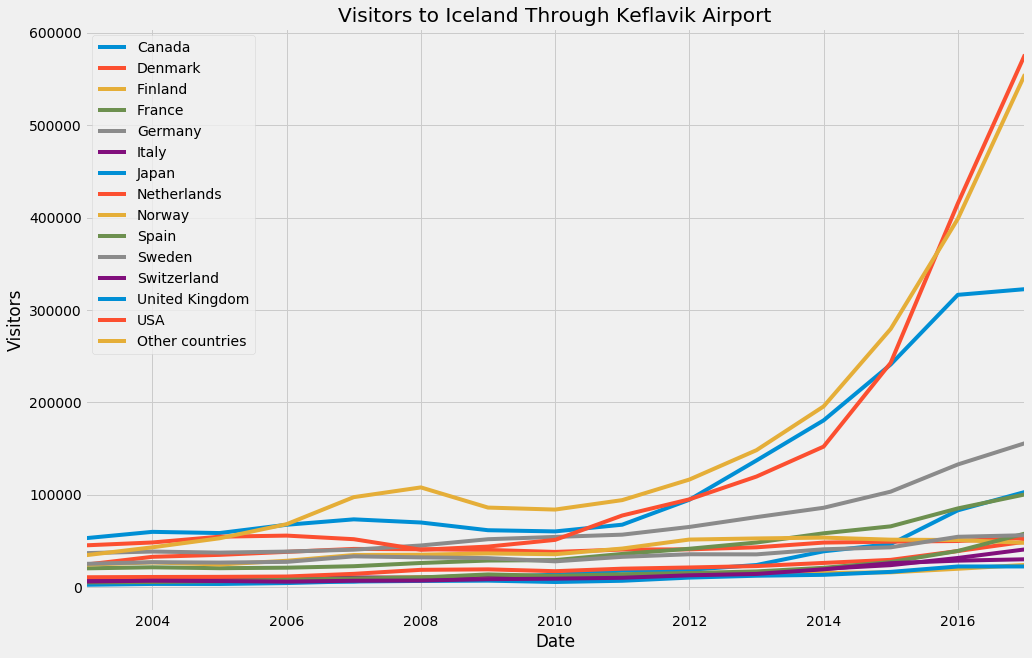

In [178]:
airport.plot(figsize=(15,10))
plt.title('Visitors to Iceland Through Keflavik Airport')
plt.ylabel('Visitors')
plt.xlabel('Date')

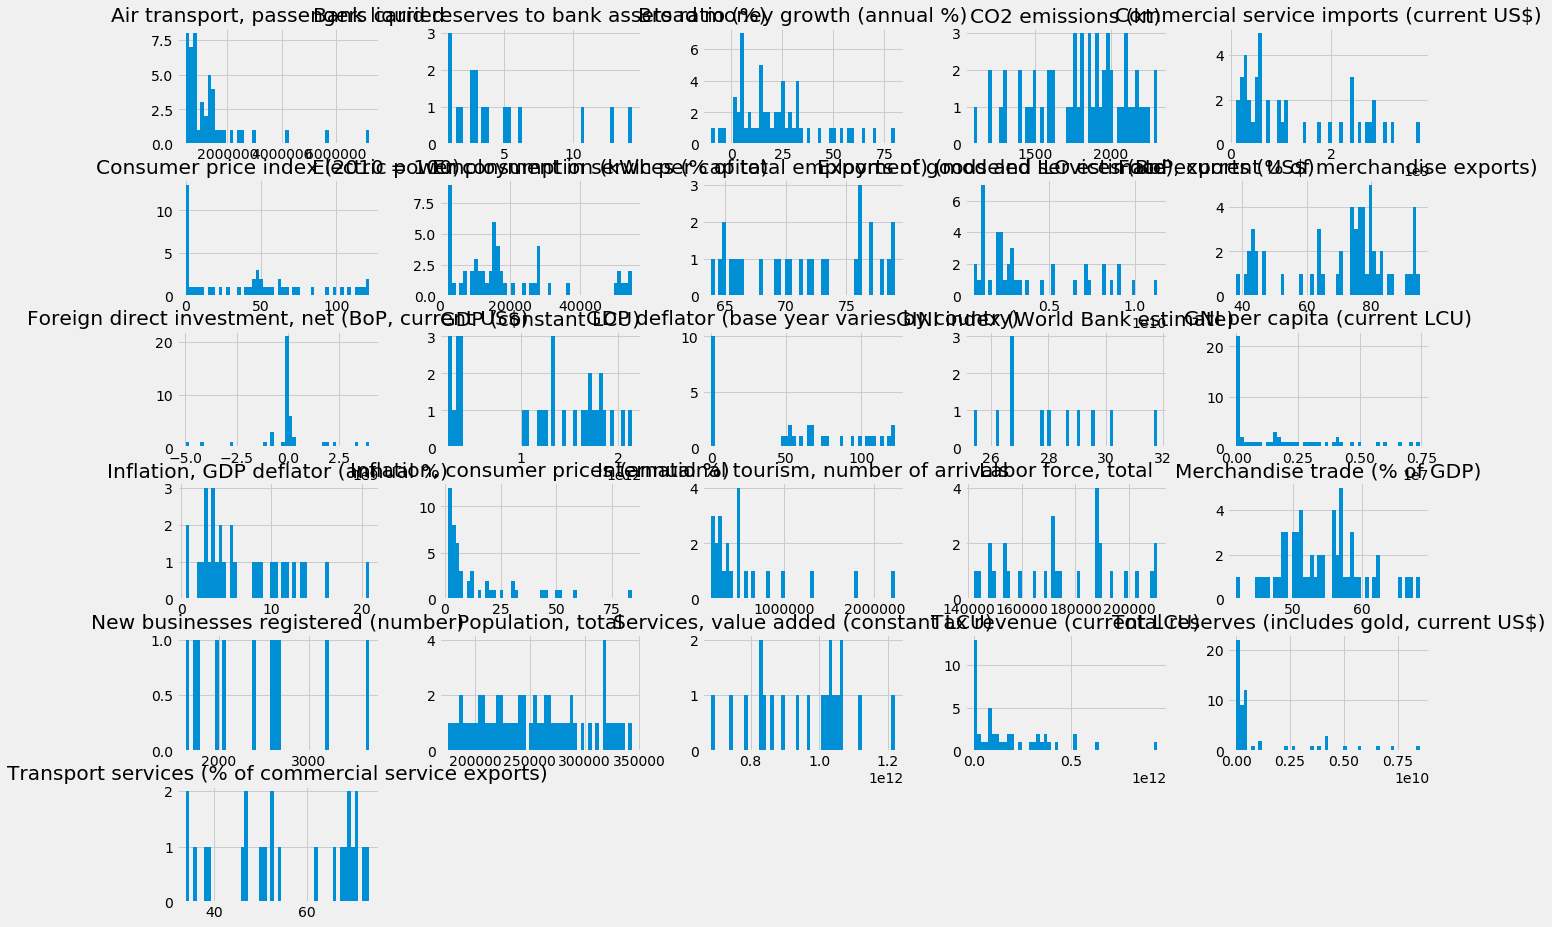

In [179]:
facts.hist(bins=50, figsize=(20,15))
plt.show()

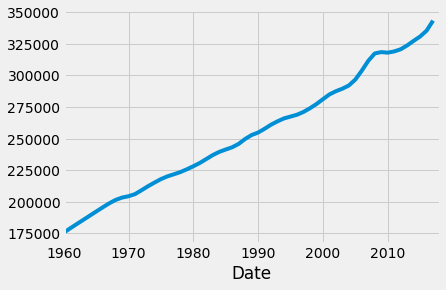

In [167]:
#chau.plot(kind="scatter", x="Population, total",y=index_col, alpha=0.2)
chau['Population, total'].plot()
#depst["Inventory"].hist()

In [180]:
corr_matrix = facts.corr()
corr_matrix["International tourism, number of arrivals"].sort_values(ascending=False)


International tourism, number of arrivals                                1.000000
Air transport, passengers carried                                        0.988095
Bank liquid reserves to bank assets ratio (%)                            0.949430
GNI per capita (current LCU)                                             0.911055
Tax revenue (current LCU)                                                0.899703
Electric power consumption (kWh per capita)                              0.878887
Exports of goods and services (BoP, current US$)                         0.842708
Labor force, total                                                       0.837129
Services, value added (constant LCU)                                     0.825059
GDP deflator (base year varies by country)                               0.817115
GDP (constant LCU)                                                       0.815502
Consumer price index (2010 = 100)                                        0.807132
Population, tota

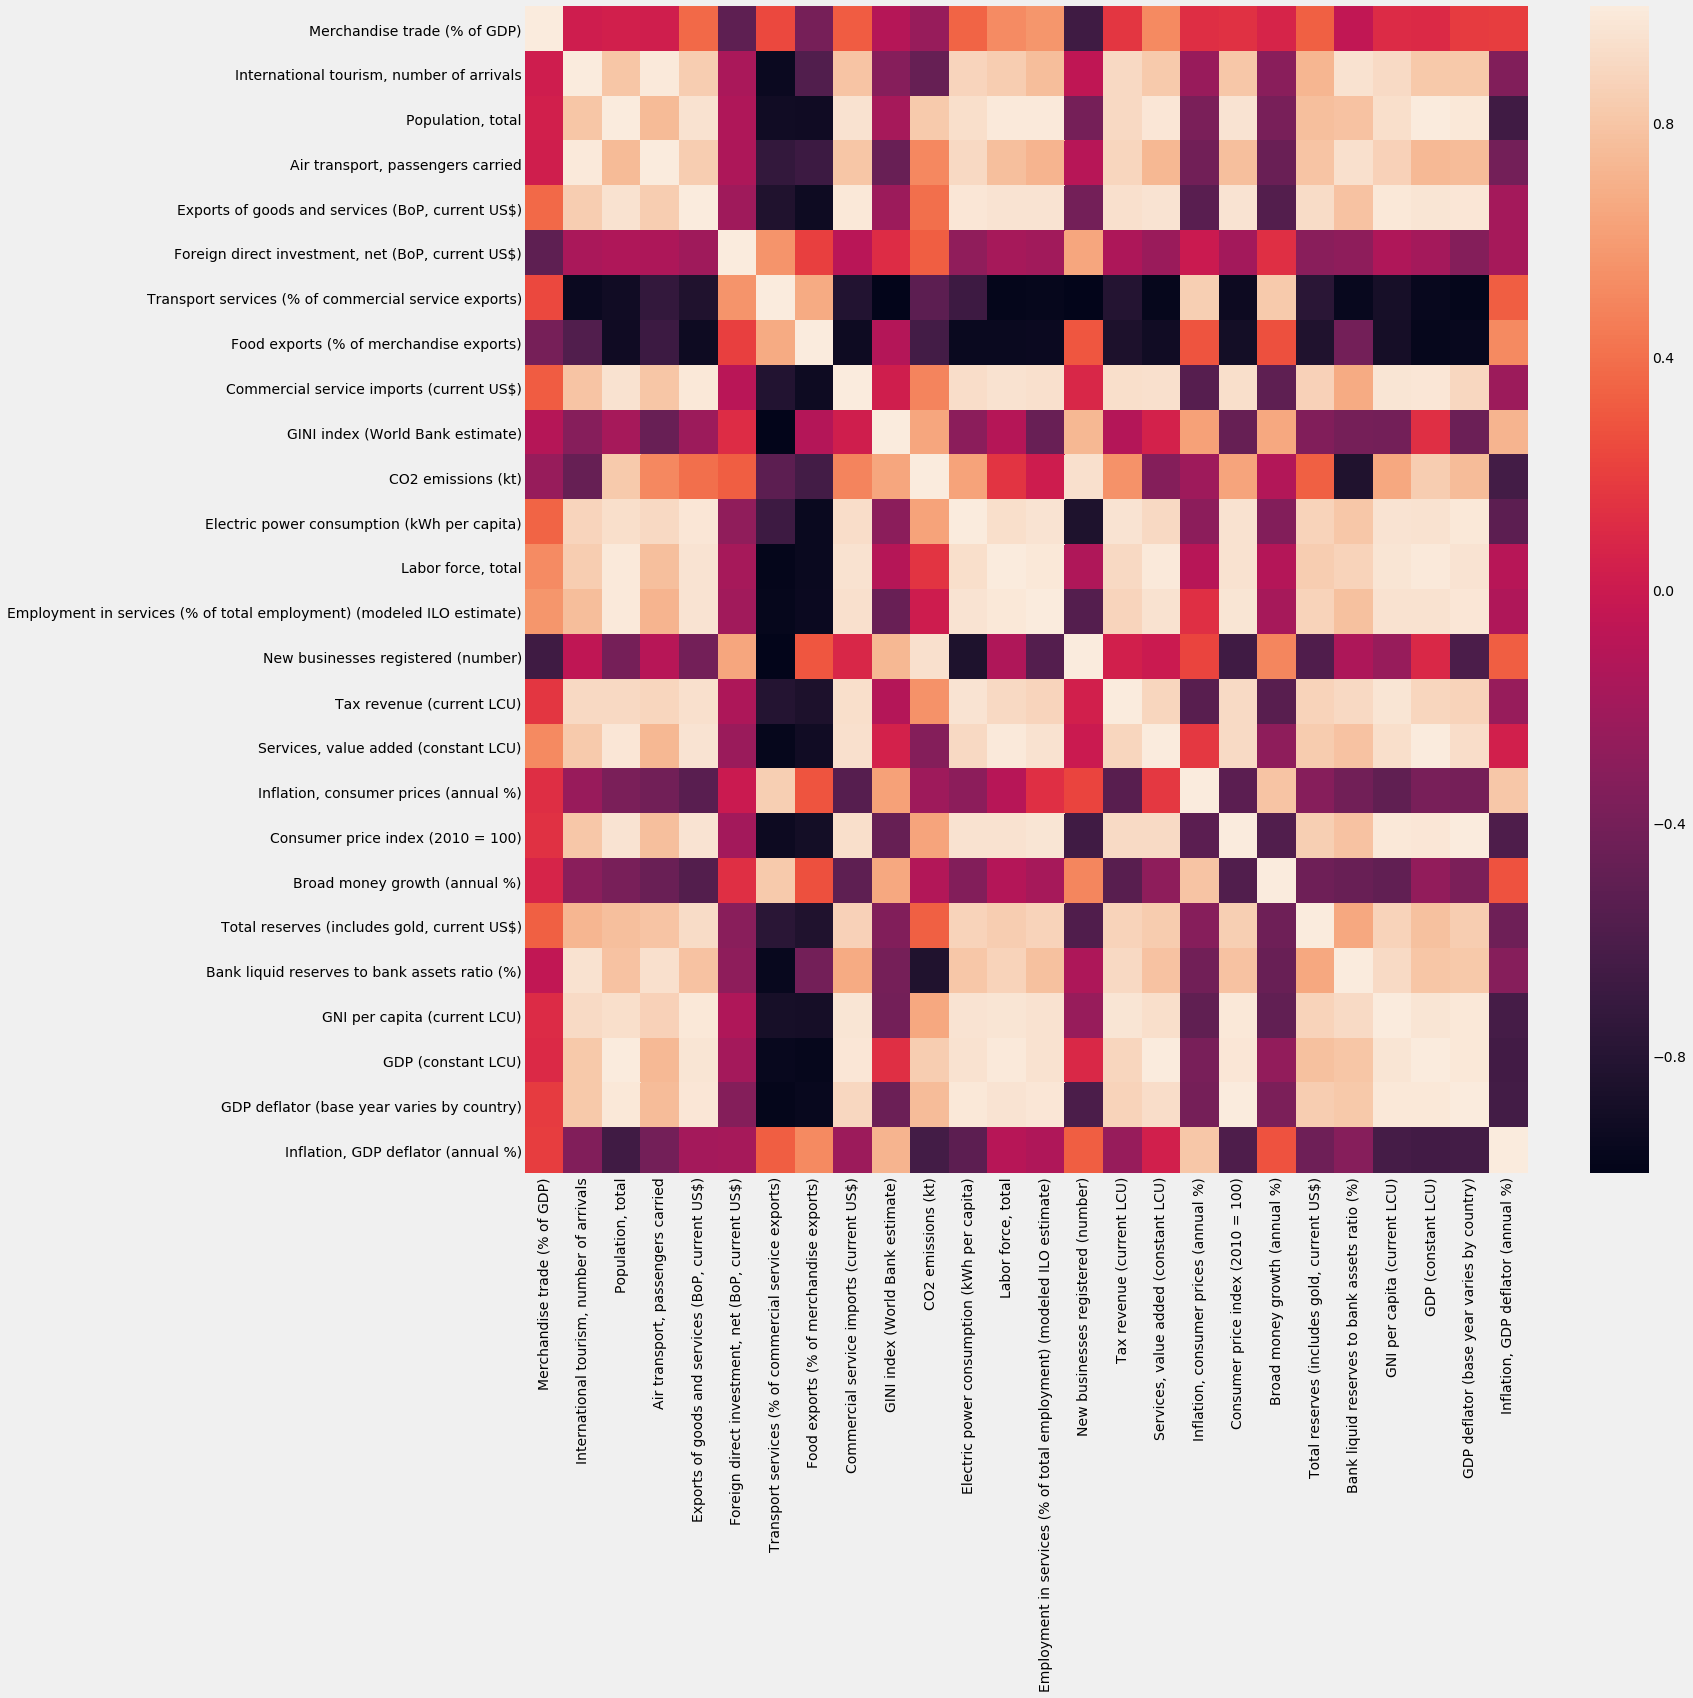

In [169]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix)

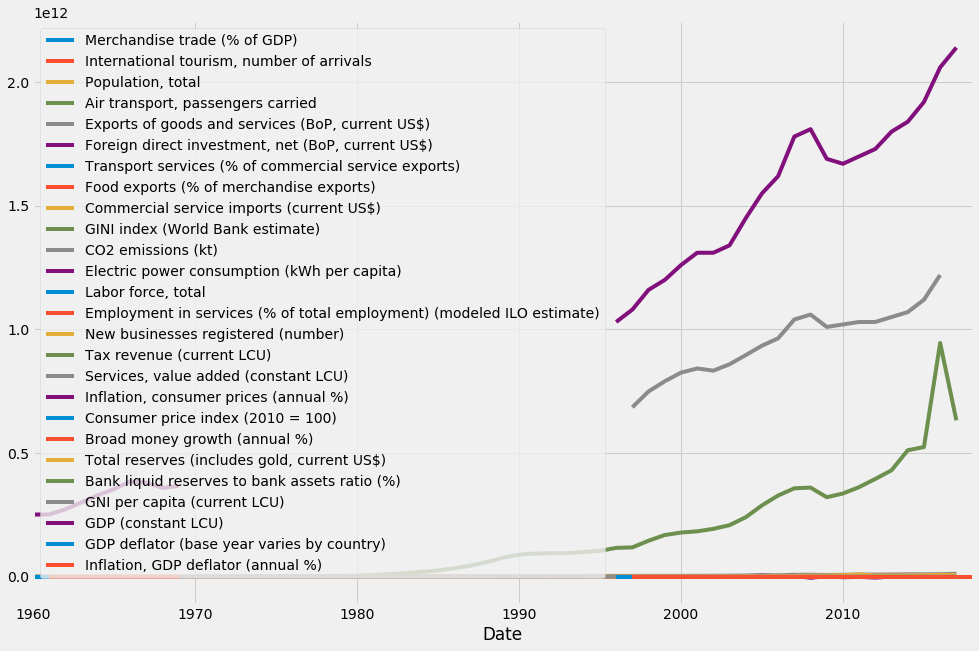

In [170]:
chau.plot(figsize=(15,10))
 
#ax1 = fig.add_subplots(1,1,1)


In [171]:
chau = sns.load_dataset('chau')
sns.pairplot(chau);

HTTPError: HTTP Error 404: Not Found

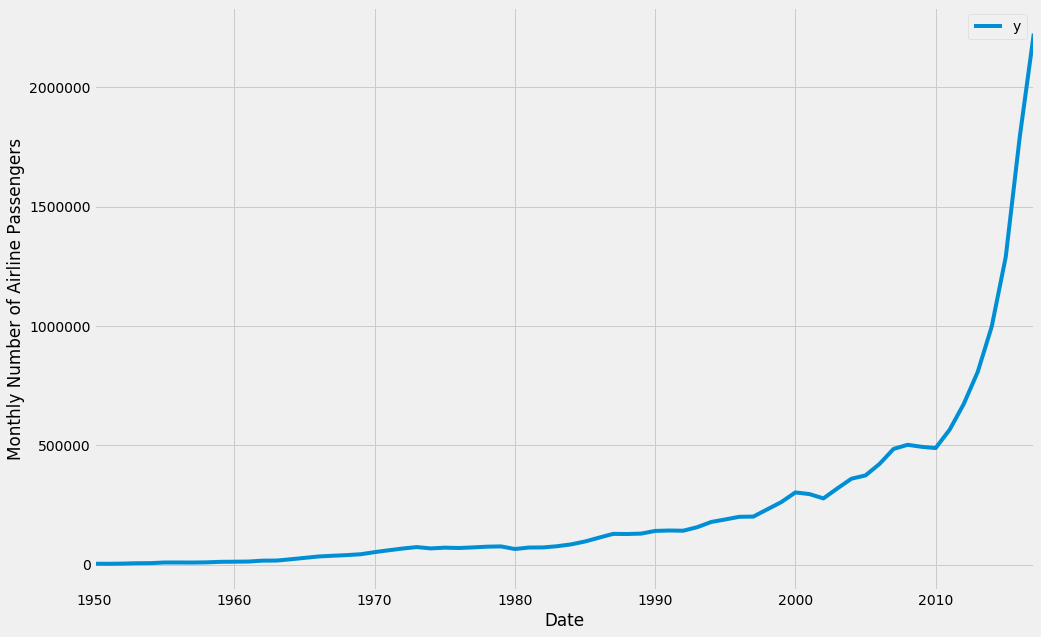

In [172]:
ax = visitor.set_index('ds').plot(figsize=(15,10))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
#ax.set_yscale('log')


plt.show()

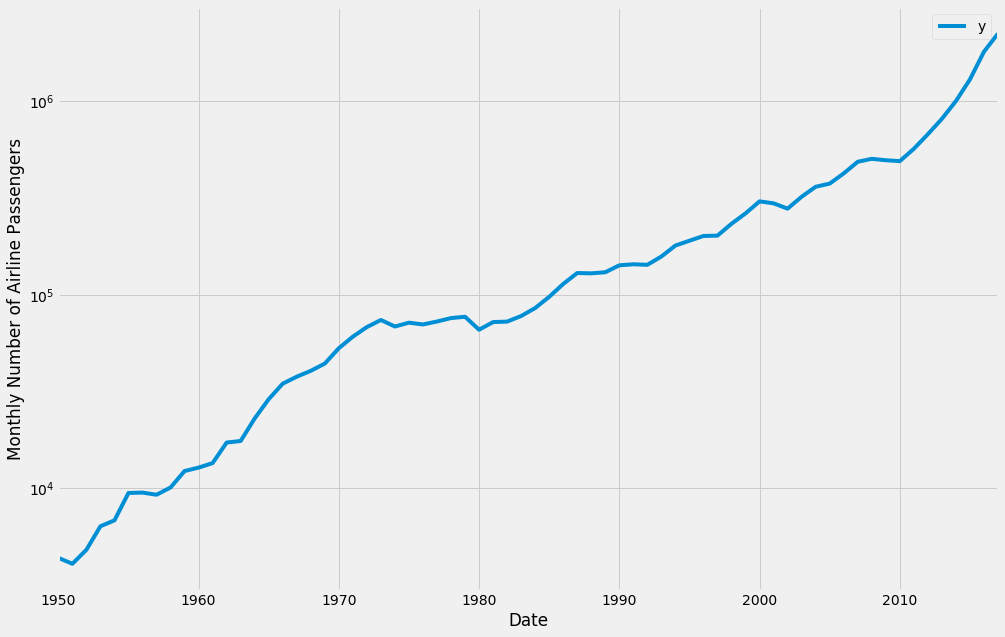

In [173]:
ax = visitor.set_index('ds').plot(figsize=(15,10))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
ax.set_yscale('log')


plt.show()

## Facebook Prophet

In [54]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [55]:
my_model.fit(visitor)

/Users/stephenhyungilkim/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future_dates = my_model.make_future_dataframe(periods=10, freq='A')
future_dates.tail()

,ds
73,2022-12-31
74,2023-12-31
75,2024-12-31
76,2025-12-31
77,2026-12-31


In [58]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
73,2022-12-31,9.973218e+05,493441.189277,1.453677e+06
74,2023-12-31,1.019246e+06,534565.087323,1.534806e+06
75,2024-12-31,1.054387e+06,571959.873561,1.532980e+06
76,2025-12-31,1.076087e+06,534393.471454,1.541834e+06
77,2026-12-31,1.097898e+06,625478.587465,1.579976e+06


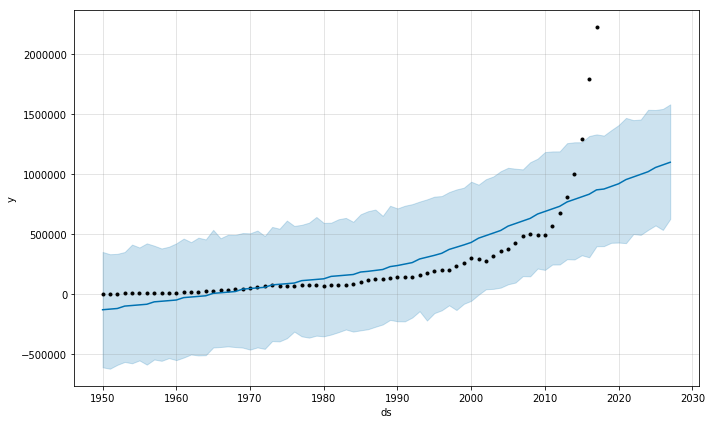

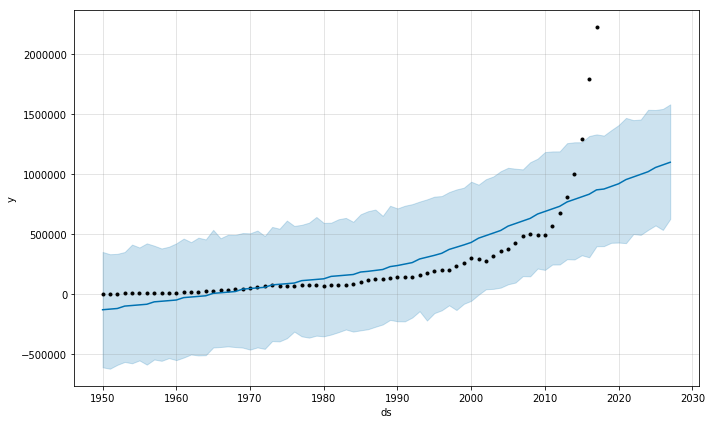

In [60]:
my_model.plot(forecast, uncertainty=True)

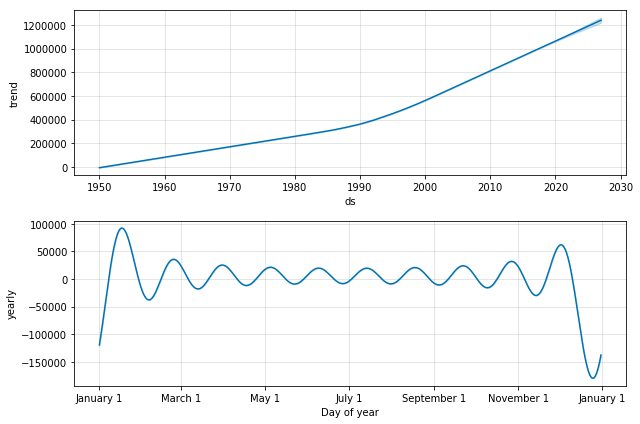

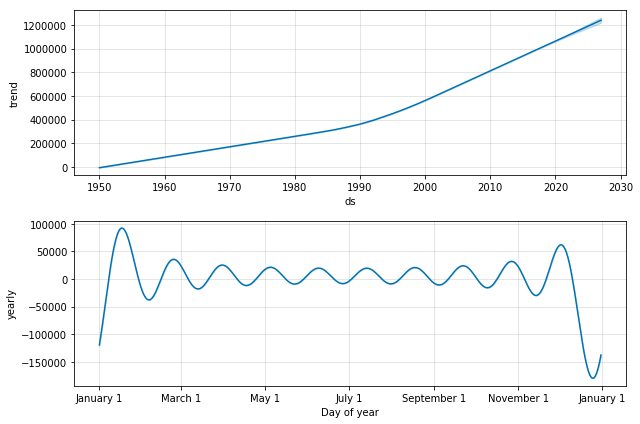

In [61]:
my_model.plot_components(forecast)